In [1]:
import psycopg2

In [15]:
import pandas as pd
import seaborn

In [4]:
conn = psycopg2.connect(user= 'postgres', password='postgres' ,host='127.0.0.1', port='5438', database='delitos'  )

In [5]:
cur = conn.cursor()

In [6]:
cur.execute('SELECT * FROM delitos')

In [7]:
cur.fetchone()

(17732,
 datetime.date(2016, 2, 24),
 '14',
 'Balvanera',
 'Hurto',
 'Comuna 3',
 2016,
 2,
 'Wednesday',
 'Tarde')

In [13]:
consulta = 'select dia_semana, avg(numeroDelitosDiaSemana), min(numeroDelitosDiaSemana), max(numeroDelitosDiaSemana) from (select barrio, anio, dia_semana, count(*) as numeroDelitosDiaSemana from delitos d group by barrio, dia_semana, anio order by barrio, anio,dia_semana) as resumen group by dia_semana order by 2 desc;'

In [26]:
datos = pd.read_sql(consulta, conn)
datos

,dia_semana,avg,min,max
0,Friday,338.340278,16,1531
1,Wednesday,333.965278,15,1441
2,Thursday,332.364583,19,1459
3,Tuesday,327.965278,10,1516
4,Monday,327.204152,2,1539
5,Saturday,297.423611,8,1621
6,Sunday,253.784722,8,1477


In [30]:
datos.avg.pct_change()*100

0          NaN
1    -1.293077
2    -0.479300
3    -1.323638
4    -0.232075
5    -9.101517
6   -14.672301
Name: avg, dtype: float64

<AxesSubplot:xlabel='dia_semana', ylabel='avg'>

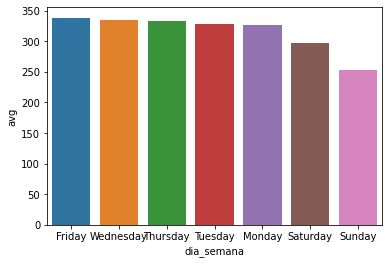

In [25]:
seaborn.barplot(data= datos,
            x='dia_semana',
            y = 'avg')
